In [1]:
import tensorflow as tf
import nltk
import numpy as np

In [2]:
proverbs=[]
with open("Proverbs.txt", "r", encoding="utf-8") as file:
    proverbs = file.readlines()

proverbs = [proverb.strip() for proverb in proverbs]
proverbs[:10]

['ა, ბატონო ბაწარიო, დავით მეფეს გასწავლიო.',
 'ა, დათვი და ა, კვალი!',
 'აასვენა, აღარ დაასვენა.',
 'ააფრინე ალალი, რაც არ არი - არ არი.',
 'აბდალი თავის პატრონის ფეხებს მეტი ჯაფა აქვსო.',
 'აბლაბუდაც ფიქრობს.',
 'აგანგალა - განგალაო, შარშან კატა მომკვდარაო.',
 'აგიაშვილის გამზრდელი ქორწილში ყოფილა დაპატიჟებული, სადაც წასულა სადილის უჭმელად, მაგრამ ქორწილისათვის ვერ მოუსწრია და შინ დაბრუნებულს უთქვამს: "იქაც მოვცდი ქორწილსაო, აქაც სადილობასაო".',
 'აგიაშვილის გამდელივით არ დაგემართოს.',
 'აგრე არ უნდა, თაყაო, შენ რომ მამული გაჰყაო.']

In [3]:
import re
def clean_sentence(sentence:str):
    # stopwords='დარომკითუ(,)123456789*.!?-:'
    return re.sub(r'[^\w\s]', '', sentence)
#   return res.split()
    # return ' '.join([word.replace(stopwords,'') for word in sentence.split()])

In [4]:
clean_sentence("ადრე ამდგარი ჩიტი ნისკარტს იწმენდს, მძინარა - თვალებს იფშვნეტს")

'ადრე ამდგარი ჩიტი ნისკარტს იწმენდს მძინარა  თვალებს იფშვნეტს'

In [5]:
cleaned_proverbs = [clean_sentence(proverb) for proverb in proverbs]
cleaned_proverbs[:20]

['ა ბატონო ბაწარიო დავით მეფეს გასწავლიო',
 'ა დათვი და ა კვალი',
 'აასვენა აღარ დაასვენა',
 'ააფრინე ალალი რაც არ არი  არ არი',
 'აბდალი თავის პატრონის ფეხებს მეტი ჯაფა აქვსო',
 'აბლაბუდაც ფიქრობს',
 'აგანგალა  განგალაო შარშან კატა მომკვდარაო',
 'აგიაშვილის გამზრდელი ქორწილში ყოფილა დაპატიჟებული სადაც წასულა სადილის უჭმელად მაგრამ ქორწილისათვის ვერ მოუსწრია და შინ დაბრუნებულს უთქვამს იქაც მოვცდი ქორწილსაო აქაც სადილობასაო',
 'აგიაშვილის გამდელივით არ დაგემართოს',
 'აგრე არ უნდა თაყაო შენ რომ მამული გაჰყაო',
 'აგორებული ქვა ხავსს არ მოიკიდებს',
 'აგურის ნატეხი ლალს შეადარეს აქაო და წითელიაო',
 'აგურს რეცხდნენ და უარესი წვენი გასდიოდა',
 'ადათია და წესია  ფეტვი ალაგზე თესია',
 'ადათის ამოწყვეტას  გვარის ამოწყვეტა სჯობია',
 'ადამიანი ადამიანის მალამოა',
 'ადამიანი სიცოცხლეს იწყებს წივილკივილით და ათავებს კვნესით',
 'ადამიანის დაბადება პირველი დღეა ქორწინება  მეორე და სიკვდილი  მესამე',
 'ადგომაში კეტი უნდა დაჯდომაში ბოძკინტიო',
 'ადგომისას ძვლებს ცალცალკე ვეძებ']

In [6]:
#average proverb length
avg_len = sum([len(proverb.split()) for proverb in cleaned_proverbs])/len(cleaned_proverbs)
print(f'average proverb length: {np.ceil(avg_len)}')

average proverb length: 7.0


In [7]:
#word frequency distribution
separate_words = ' '.join(cleaned_proverbs).split()
freq_dist = dict(nltk.probability.FreqDist(separate_words).items())
# print(f'და: {freq_dist["და"]}, რომ: {freq_dist["რომ"]}, კი: {freq_dist["კი"]}, არ: {freq_dist["არ"]}, ა: {freq_dist["არ"]}')
sorted(freq_dist.items(), key=lambda x:x[1], reverse=True)[:10]

[('და', 714),
 ('არ', 537),
 ('რომ', 272),
 ('თუ', 218),
 ('კაცი', 151),
 ('ვერ', 137),
 ('არა', 134),
 ('ერთი', 134),
 ('კი', 123),
 ('უნდა', 118)]

In [8]:
# stop_words_removed = [word for word in separate_words if word not in stop_words]
# stop_words_removed[:20]
# cleaned_prover
def remove_stopwords(sentence:str):
    stopwords = ['და', 'რომ', 'თუ', 'კი']
    return ' '.join([word for word in sentence.split() if word not in stopwords])

In [9]:
#removing stopwords from every proverb
for index,proverb in enumerate(cleaned_proverbs):
    cleaned_proverbs[index] = remove_stopwords(proverb)

cleaned_proverbs[10:25]

['აგორებული ქვა ხავსს არ მოიკიდებს',
 'აგურის ნატეხი ლალს შეადარეს აქაო წითელიაო',
 'აგურს რეცხდნენ უარესი წვენი გასდიოდა',
 'ადათია წესია ფეტვი ალაგზე თესია',
 'ადათის ამოწყვეტას გვარის ამოწყვეტა სჯობია',
 'ადამიანი ადამიანის მალამოა',
 'ადამიანი სიცოცხლეს იწყებს წივილკივილით ათავებს კვნესით',
 'ადამიანის დაბადება პირველი დღეა ქორწინება მეორე სიკვდილი მესამე',
 'ადგომაში კეტი უნდა დაჯდომაში ბოძკინტიო',
 'ადგომისას ძვლებს ცალცალკე ვეძებ',
 'ადე ნახე ჭირიო დაჯე ნახე ლხინიო',
 'ადე დაბრუნდი წისქვილო დასჯერდი შენს ქონებასო',
 'ადლი ორად მოგივა',
 'ადრე ამდგარი ჩიტი ნისკარტს იწმენდს მძინარა თვალებს იფშვნეტს',
 'ადრე ამდგარსა კურდღელსა ვერ მოეწევა მწევარი']

In [14]:
#creating word to index mapping
unique_words = list(set(separate_words))
total_words = len(unique_words)
word_to_index = {}
for index,word in enumerate(unique_words):
    word_to_index[word] = index+1

print(len(unique_words))
print(len(word_to_index.keys()))

10576
10576


In [15]:
def generate_sequence_and_labels(cleaned_proverbs):
    sequences = []
    for line in cleaned_proverbs:
        token_list = line.split()
        token_list_numerized = [word_to_index[token] for token in token_list]
        for i in range(1, len(token_list_numerized)):
            n_gram_sequence = token_list_numerized[:i+1]
            sequences.append(n_gram_sequence)
     # Pad sequences for equal input length
    max_sequence_len = max([len(seq) for seq in sequences])
    sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))
     # Split sequences between the "input" sequence and "output" predicted word
    input_sequences, labels = sequences[:,:-1], sequences[:,-1]
    #  print(input_sequences,labels)
     # One-hot encode the labels
    labels = tf.keras.utils.to_categorical(labels, num_classes=total_words+1)
    return max_sequence_len,input_sequences, labels

In [16]:
max_sequence_len,training_input_sequences,training_labels = generate_sequence_and_labels(cleaned_proverbs)
print(f'max sequence len: {max_sequence_len}')
print("first 10 input sequences")
print(training_input_sequences[:10]) #(18021, 37)
print("first 10 labels")
print(training_labels[:10])
print(training_labels.shape) #(18021, 10577)

max sequence len: 38
first 10 input sequences
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 9847]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 9847 8872]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 9847 8872 6006]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 9847 8872 6006 8123]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 9847 8872 6006 8123 

In [17]:
#creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words+1,'softmax')
])

In [18]:
#getting validation data
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(training_input_sequences, training_labels, test_size=0.1, random_state=42)
print(f'train data shape: {train_data.shape}')
print(f'train labels shape: {train_labels.shape}')
print(f'val data shape: {val_data.shape}')
print(f'val labels shape: {val_labels.shape}')

train data shape: (16218, 37)
train labels shape: (16218, 10577)
val data shape: (1803, 37)
val labels shape: (1803, 10577)


In [ ]:
#training model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
history = model.fit(train_data,
                    train_labels,
                    validation_data=(val_data,val_labels),
                    batch_size=32,
                    epochs=20,
                    verbose='auto')

Epoch 1/20
507/507 [==============================] - 41s 69ms/step - loss: 8.4957 - accuracy: 0.0310 - val_loss: 10.3679 - val_accuracy: 0.0316
Epoch 2/20
507/507 [==============================] - 34s 68ms/step - loss: 7.5425 - accuracy: 0.0411 - val_loss: 11.1138 - val_accuracy: 0.0266
Epoch 3/20
507/507 [==============================] - 35s 69ms/step - loss: 6.3596 - accuracy: 0.0744 - val_loss: 11.8088 - val_accuracy: 0.0222
Epoch 4/20
507/507 [==============================] - 33s 65ms/step - loss: 5.3086 - accuracy: 0.1298 - val_loss: 12.3532 - val_accuracy: 0.0155
Epoch 5/20
507/507 [==============================] - 35s 68ms/step - loss: 4.4061 - accuracy: 0.2044 - val_loss: 12.8672 - val_accuracy: 0.0172
Epoch 6/20
507/507 [==============================] - 33s 66ms/step - loss: 3.6570 - accuracy: 0.3073 - val_loss: 13.3539 - val_accuracy: 0.0183
Epoch 7/20
507/507 [==============================] - 35s 68ms/step - loss: 3.0643 - accuracy: 0.4123 - val_loss: 14.0008 - val_ac

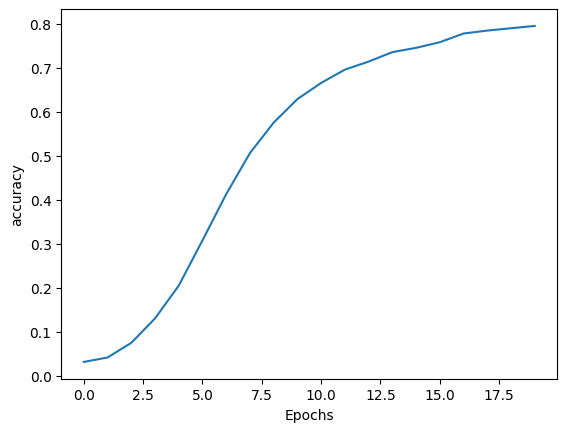

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
model.save("my_model.h5")

In [20]:
loaded_model = tf.keras.models.load_model('my_model.h5')

In [15]:
loaded_model.count_params()

1124121

In [21]:
#predict number, see word
index_to_word = {index:word for word,index in word_to_index.items()}

In [22]:
def show_predicted_proverb(seed_word,words_to_predict_len):
    input_sequence = [word_to_index[seed_word]]
    predicted_words = [seed_word]
    for _ in range(words_to_predict_len):
        input_vector = np.array(tf.keras.preprocessing.sequence
                                .pad_sequences([input_sequence],maxlen=max_sequence_len-1, padding='pre'))
        prediction = index_to_word[np.argmax(loaded_model.predict(input_vector))]
        input_sequence.append(word_to_index[prediction])
        predicted_words.append(prediction)
    return predicted_words

In [23]:
predicted_length = 5
seeds = ["ადამიანი", "ავი", "ამხანაგი","ასეთი","ბავშვი","ბედი"]
for seed in seeds:
    print(' '.join(show_predicted_proverb(seed,predicted_length)))

1/1 [==============================] - 0s 20ms/step
ადამიანი ქმნილი დაღმა სწავლაში დაიბრუნესო ზღვას
1/1 [==============================] - 0s 21ms/step
ავი თავისთვის დაბრუნდებაო კატამ მოხვდებაო ცხარეაო
1/1 [==============================] - 0s 22ms/step
ამხანაგი ქალსაო კატამ ბატონთანო ბუზები აზიდვინებენ
1/1 [==============================] - 0s 22ms/step
ასეთი ტყემალიო დაბადებაც გაღარიბდება გაჭირვებითა მაღალდაბალს
1/1 [==============================] - 0s 19ms/step
ბავშვი ხრავს დაბადებაც ალიასა თავისივე დევნა
1/1 [==============================] - 0s 18ms/step
ბედი ლხინათაც სავაგლახოზე ძროხა ძერასაო გამოდნების
